<h3 >P-34</h3>

## Phising Website detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *

In [2]:
df=pd.read_csv(r'../Datasets/phising.csv')
df.head()

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,www.voting-yahoo.com,10000000,0,0,0,20,0,0,1,20,2,1
1,www.zvon.org/xxl/WSDL1.1/Output/index.html,194914,0,1,7305,42,0,0,0,12,2,0
2,tecportais.com/file-security-update-infonfmati...,10000000,0,0,0,155,0,0,0,14,1,1
3,bima.astro.umd.edu/nemo/linuxastro/,7001,0,0,0,35,0,0,0,18,3,0
4,huarui-tec.com/js/?us.battle.net/login/en/?ref...,10000000,0,1,730,79,0,0,1,14,1,1


In [3]:
df.shape

(95910, 12)

In [4]:
df.drop('domain',axis=1,inplace=True)

In [5]:
df.isna().sum()

ranking           0
isIp              0
valid             0
activeDuration    0
urlLen            0
is@               0
isredirect        0
haveDash          0
domainLen         0
nosOfSubdomain    0
label             0
dtype: int64

In [6]:
corr=df.corr()
corr

,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
ranking,1.000000,0.002302,-0.271810,-0.462385,0.104733,0.022798,0.059468,0.103518,0.154659,0.105718,0.516873
isIp,0.002302,1.000000,0.004698,0.000379,-0.001197,-0.000799,-0.001312,-0.002781,0.006634,0.027164,0.012811
valid,-0.271810,0.004698,1.000000,0.812531,-0.050022,-0.023917,-0.026677,-0.128651,-0.126793,-0.174061,-0.266774
activeDuration,-0.462385,0.000379,0.812531,1.000000,-0.133796,-0.026034,-0.047993,-0.150173,-0.178393,-0.178431,-0.523114
urlLen,0.104733,-0.001197,-0.050022,-0.133796,1.000000,0.017182,-0.010021,0.370280,0.497716,0.346738,0.396519
is@,0.022798,-0.000799,-0.023917,-0.026034,0.017182,1.000000,-0.004567,0.000549,-0.002268,-0.003439,0.039777
isredirect,0.059468,-0.001312,-0.026677,-0.047993,-0.010021,-0.004567,1.000000,-0.007222,-0.015948,-0.026618,0.073247
haveDash,0.103518,-0.002781,-0.128651,-0.150173,0.370280,0.000549,-0.007222,1.000000,0.365871,0.250143,0.239623
domainLen,0.154659,0.006634,-0.126793,-0.178393,0.497716,-0.002268,-0.015948,0.365871,1.000000,0.863078,0.231828
nosOfSubdomain,0.105718,0.027164,-0.174061,-0.178431,0.346738,-0.003439,-0.026618,0.250143,0.863078,1.000000,0.113249


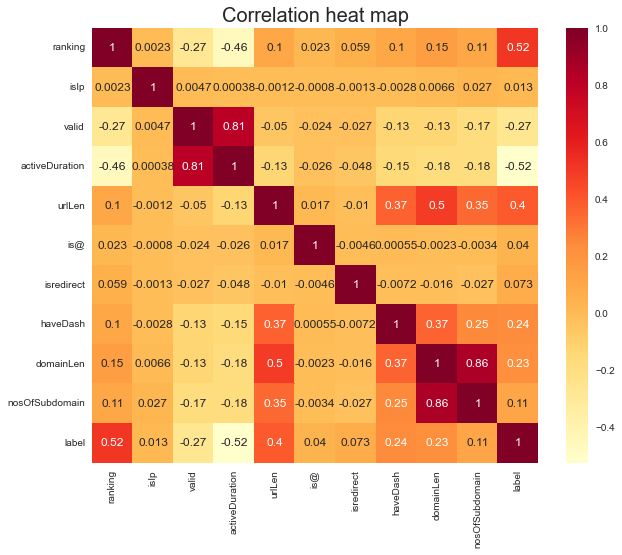

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap="YlOrRd")
plt.title("Correlation heat map",fontsize=20)
plt.show()

In [8]:
df.head()

,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,10000000,0,0,0,20,0,0,1,20,2,1
1,194914,0,1,7305,42,0,0,0,12,2,0
2,10000000,0,0,0,155,0,0,0,14,1,1
3,7001,0,0,0,35,0,0,0,18,3,0
4,10000000,0,1,730,79,0,0,1,14,1,1


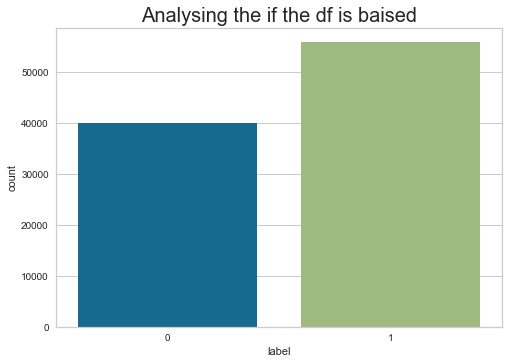

In [9]:
sns.countplot(df.label)
plt.title("Analysing the if the df is baised",fontsize=20)
plt.show()

In [10]:
df.label.value_counts()

1    55914
0    39996
Name: label, dtype: int64

In [11]:
classify=setup(data=df,target='label')

,Description,Value
0,session_id,867
1,Target,label
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(95910, 11)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [12]:
model=compare_models(sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9544,0.9883,0.9626,0.9591,0.9608,0.9062,0.9062,3.7470
et,Extra Trees Classifier,0.9522,0.9825,0.9559,0.9617,0.9588,0.9019,0.9020,3.7910
lightgbm,Light Gradient Boosting Machine,0.9453,0.9880,0.9595,0.9471,0.9532,0.8872,0.8874,0.8770
dt,Decision Tree Classifier,0.9450,0.9578,0.9517,0.9536,0.9526,0.8870,0.8870,0.2270
knn,K Neighbors Classifier,0.9368,0.9765,0.9471,0.9443,0.9457,0.8700,0.8700,2.8340
gbc,Gradient Boosting Classifier,0.9274,0.9802,0.9543,0.9234,0.9386,0.8498,0.8505,5.3490
ada,Ada Boost Classifier,0.9090,0.9679,0.9367,0.9095,0.9229,0.8119,0.8125,1.7010
lda,Linear Discriminant Analysis,0.8573,0.9276,0.8704,0.8827,0.8765,0.7077,0.7078,0.2420
ridge,Ridge Classifier,0.8571,0.0000,0.8705,0.8822,0.8763,0.7071,0.7073,0.1180
nb,Naive Bayes,0.8275,0.8793,0.8065,0.8868,0.8447,0.6518,0.6555,0.0980


In [13]:
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=867, verbose=0,
                       warm_start=False)

In [14]:
model_tune=tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9083,0.9692,0.9429,0.9035,0.9228,0.8099,0.8110
1,0.9075,0.9670,0.9393,0.9052,0.9219,0.8086,0.8094
2,0.9151,0.9727,0.9434,0.9134,0.9282,0.8245,0.8251
3,0.9106,0.9695,0.9465,0.9043,0.9249,0.8147,0.8160
4,0.9088,0.9691,0.9447,0.9031,0.9234,0.8110,0.8123
5,0.9115,0.9711,0.9444,0.9073,0.9255,0.8167,0.8177
6,0.9082,0.9675,0.9457,0.9014,0.9230,0.8096,0.8111
7,0.9129,0.9691,0.9516,0.9037,0.9270,0.8191,0.8208
8,0.9146,0.9699,0.9506,0.9071,0.9283,0.8230,0.8243
9,0.9057,0.9672,0.9424,0.9002,0.9208,0.8045,0.8058


In [15]:
type(predict_model(model_tune))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9089,0.9688,0.9412,0.9070,0.9238,0.8108,0.8117


pandas.core.frame.DataFrame

In [16]:
model_tune

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='gini', max_depth=5, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0005, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=110,
                       n_jobs=-1, oob_score=False, random_state=867, verbose=0,
                       warm_start=False)